<a href="https://colab.research.google.com/github/gsahonero/ACR122U-reader-writer/blob/master/notebooks/Field_map_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cape Town

In [1]:
# prompt: make a 3D plot of a provided csv file where the data is separated by spaces only. The color of each point must agree with its value. The scale bar should go from zero to the 1.1 times the maximum. The first row is the headers

!pip install pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming the uploaded file is named 'data.csv' and is space-separated
file_name = '/content/Field_Map_5mm.csv'

# Load the data from the space-separated CSV file
df_capetown = pd.read_csv(file_name, sep=',')

# Assuming the columns are named 'x', 'y', and 'z' based on typical 3D plot data
# If your headers are different, replace 'x', 'y', 'z' with your actual column names
x_data = df_capetown['x']
y_data = df_capetown['y']
z_data = df_capetown['z']
value_data = df_capetown['reading']

In [2]:
import numpy as np
print("Standard deviation:", np.std(value_data))
print("Average:", np.mean(value_data))

Standard deviation: 0.7186858606868474
Average: 495.0069222343921


In [3]:
# Calculate the distance of each point from the origin (0,0,0)
df_capetown['distance_from_origin'] = np.sqrt(df_capetown['x']**2 + df_capetown['y']**2 + df_capetown['z']**2)

# Filter the DataFrame to include only points within the sphere of radius 30mm
df_capetown_filtered = df_capetown[df_capetown['distance_from_origin'] <= 30].copy()

# Display the filtered DataFrame
display(df_capetown_filtered.head())

,x,y,z,reading,distance_from_origin
0,0,0,-30,496.28,30.000000
1,-16,-1,-25,496.28,29.698485
2,-16,4,-25,495.83,29.949958
3,-11,-11,-25,495.88,29.444864
4,-11,-6,-25,496.05,27.964263


In [4]:
value_data = df_capetown_filtered['reading']
value_data = df_capetown['reading']
# Calculate magnetic field inhomogeneity
max_value = value_data.max()
min_value = value_data.min()
mean_value = value_data.mean()

inhomogeneity = ((max_value - min_value) / mean_value) * 1e6

print(f"Maximum value: {max_value:.2f}")
print(f"Minimum value: {min_value:.2f}")
print(f"Mean value: {mean_value:.2f}")
print(f"Magnetic field inhomogeneity: {inhomogeneity:.2f} ppm")

Maximum value: 496.59
Minimum value: 492.86
Mean value: 495.01
Magnetic field inhomogeneity: 7535.25 ppm


In [5]:
print("Without filtering:", len(df_capetown))
print("Filtering some data:", len(df_capetown_filtered))

Without filtering: 916
Filtering some data: 916


**Important** - For Cape Town data is always inside the sphere.

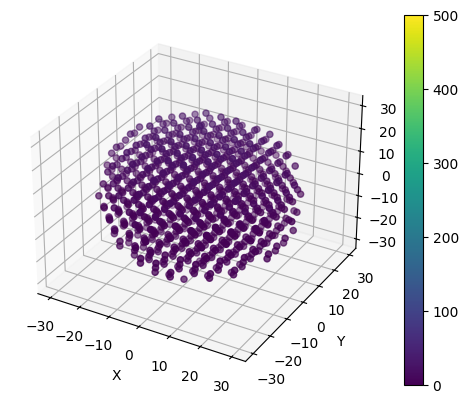

In [6]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on z value
scatter = ax.scatter(x_data, y_data, z_data, c=z_data, cmap='viridis')

# Add a color bar
cbar = fig.colorbar(scatter)

# Set the color bar scale
max_z = z_data.max()
cbar.mappable.set_clim(vmin=0.0,vmax=500) #this works

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

# Montreal

In [7]:
# Assuming the uploaded file is named 'data.csv' and is space-separated
file_name_montreal = '/content/semi_automatic_field_map_mm_mT_dsv_30.csv'

# Load the data from the space-separated CSV file
df_montreal = pd.read_csv(file_name_montreal, sep=',')

# Assuming the columns are named 'x', 'y', and 'z' based on typical 3D plot data
# If your headers are different, replace 'x', 'y', 'z' with your actual column names
x_data_montreal = df_montreal['x']
y_data_montreal = df_montreal['y']
z_data_montreal = df_montreal['z']
value_data_montreal = df_montreal['Field']

In [8]:
# Calculate the distance of each point from the origin (0,0,0)
df_montreal['distance_from_origin'] = np.sqrt(df_montreal['x']**2 + df_montreal['y']**2 + df_montreal['z']**2)

# Filter the DataFrame to include only points within the sphere of radius 30mm
df_montreal_filtered = df_montreal[df_montreal['distance_from_origin'] <= 30].copy()

# Display the filtered DataFrame
display(df_montreal_filtered.head())

,x,y,z,Field (mT),Field,distance_from_origin
7,-20.0,-10.0,-20,47.676,47.676,30.000000
8,-20.0,0.0,-20,48.734,48.734,28.284271
9,-20.0,10.0,-20,48.041,48.041,30.000000
13,-10.0,-20.0,-20,48.432,48.432,30.000000
14,-10.0,-10.0,-20,48.068,48.068,24.494897


In [9]:
print("Without filtering:", len(df_montreal))
print("Filtering some data:", len(df_montreal_filtered))

Without filtering: 225
Filtering some data: 121


**Important** - For Montreal, 50% of the data is out of the sphere. Notice we are using `semi_automatic_field_map_mm_mT_dsv_30.csv`

PPM:

In [10]:
value_data_montreal = df_montreal_filtered['Field']
#value_data_montreal = df_montreal['Field']
# Calculate magnetic field inhomogeneity
max_value = value_data_montreal.max()
min_value = value_data_montreal.min()
mean_value = value_data_montreal.mean()

inhomogeneity = ((max_value - min_value) / mean_value) * 1e6

print(f"Maximum value: {max_value:.2f}")
print(f"Minimum value: {min_value:.2f}")
print(f"Mean value: {mean_value:.2f}")
print(f"Magnetic field inhomogeneity: {inhomogeneity:.2f} ppm")

Maximum value: 49.33
Minimum value: 46.84
Mean value: 48.70
Magnetic field inhomogeneity: 51088.52 ppm


In [24]:
from scipy.special import sph_harm
from scipy.optimize import leastsq
import numpy as np # Ensure numpy is imported

# Define a function to calculate the spherical harmonic expansion
def sh_model(params, r, theta, phi):
    # Here we are using a simple model with only a few terms.
    # A more complex model might include more terms.
    c00 = params[0]
    c10 = params[1]
    c11_real = params[2]
    c11_imag = params[3]

    # Convert Cartesian coordinates to spherical coordinates
    # r, theta (polar angle, 0 to pi), phi (azimuthal angle, 0 to 2*pi)
    # Note: scipy's sph_harm uses theta as polar and phi as azimuthal
    # Our data is in cartesian, so we need to convert.
    # We already have r (distance_from_origin)

    # Add small epsilon to avoid division by zero for points at the origin or on the z-axis
    r_safe = r + np.finfo(float).eps
    theta = np.arccos(df_montreal_filtered['z'] / r_safe)

    # Use arctan2 for phi calculation
    phi = np.arctan2(df_montreal_filtered['y'], df_montreal_filtered['x'])


    # Calculate the spherical harmonic terms
    Y00 = sph_harm(0, 0, phi, theta)
    Y10 = sph_harm(0, 1, phi, theta)
    Y11 = sph_harm(1, 1, phi, theta) # This is the complex Y11

    # Construct the model field
    model_field = c00 * Y00 + c10 * Y10 + (c11_real + 1j * c11_imag) * Y11

    # Return the real part of the model field
    return np.real(model_field)

# Define the error function (difference between model and data)
def error_func(params, r, theta, phi, data):
    return sh_model(params, r, theta, phi) - data

# Initial guess for the parameters (c00, c10, c11_real, c11_imag)
initial_params = [np.mean(value_data_montreal), 0, 0, 0]

# Convert filtered Cartesian coordinates to spherical coordinates for fitting
r_filtered = df_montreal_filtered['distance_from_origin']
theta_filtered = np.arccos(df_montreal_filtered['z'] / (r_filtered + np.finfo(float).eps)) # Add epsilon here too
phi_filtered = np.arctan2(df_montreal_filtered['y'], df_montreal_filtered['x'])

# Perform the least squares fit
fitted_params, covariance, infodict, errmsg, success = leastsq(
    error_func,
    initial_params,
    args=(r_filtered, theta_filtered, phi_filtered, value_data_montreal),
    full_output=True
)

print("Fitted parameters (c00, c10, c11_real, c11_imag):", fitted_params)

# You can now use these fitted parameters to predict the field at any point (r, theta, phi)
# For example, to get the modeled field for the filtered data points:
modeled_field = sh_model(fitted_params, r_filtered, theta_filtered, phi_filtered)

# You could then visualize the original data vs the modeled data, or the difference (residual)

Fitted parameters (c00, c10, c11_real, c11_imag): [ 1.72632754e+02  1.25440854e-01 -3.44731103e-01 -4.90731157e-01]


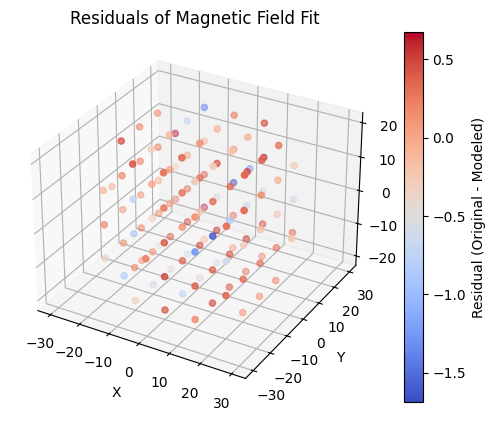

In [22]:
# Calculate the residuals
residuals = value_data_montreal - modeled_field

# Create a 3D scatter plot of the residuals
fig_residuals = plt.figure()
ax_residuals = fig_residuals.add_subplot(111, projection='3d')

scatter_residuals = ax_residuals.scatter(
    df_montreal_filtered['x'],
    df_montreal_filtered['y'],
    df_montreal_filtered['z'],
    c=residuals,
    cmap='coolwarm' # Using a divergent colormap to show positive and negative residuals
)

# Add a color bar
cbar_residuals = fig_residuals.colorbar(scatter_residuals)
cbar_residuals.set_label('Residual (Original - Modeled)')

# Set labels for axes
ax_residuals.set_xlabel('X')
ax_residuals.set_ylabel('Y')
ax_residuals.set_zlabel('Z')
ax_residuals.set_title('Residuals of Magnetic Field Fit')

# Show the plot
plt.show()

In [23]:
np.abs(modeled_field)

array([48.63505352, 48.57124348, 48.52202369, 48.7312693 , 48.66935007,
       48.59071643, 48.53091737, 48.50520964, 48.77534796, 48.71980344,
       48.63751009, 48.56815801, 48.53557549, 48.81067102, 48.76659692,
       48.69724501, 48.62816422, 48.58461136, 48.79385696, 48.73967997,
       48.68082713, 48.71199868, 48.64574848, 48.56486218, 48.50731577,
       48.48593902, 48.76358825, 48.69253739, 48.57124348, 48.49676398,
       48.48672285, 48.82303619, 48.77534796, 48.63751009, 48.53557549,
       48.51974533, 48.8608351 , 48.8300652 , 48.73967997, 48.6342918 ,
       48.5839697 , 48.87080211, 48.84024218, 48.77791935, 48.70180947,
       48.64474246, 48.57969823, 48.7344688 , 48.66809493, 48.57969823,
       48.51644951, 48.49469633, 48.79718194, 48.7344688 , 48.57969823,
       48.49469633, 48.49389108, 48.86834555, 48.86834555, 48.86834555,
       48.81790338, 48.52925606, 48.52925606, 48.52925606, 48.90371053,
       48.90290528, 48.81790338, 48.66313281, 48.60041967, 48.90

In [26]:
# Calculate inhomogeneity of the modeled field
max_modeled_field = modeled_field.max()
min_modeled_field = modeled_field.min()
mean_modeled_field = modeled_field.mean()

inhomogeneity_modeled = ((max_modeled_field - min_modeled_field) / mean_modeled_field) * 1e6

print(f"Maximum modeled field: {max_modeled_field:.2f}")
print(f"Minimum modeled field: {min_modeled_field:.2f}")
print(f"Mean modeled field: {mean_modeled_field:.2f}")
print(f"Magnetic field inhomogeneity of modeled field: {inhomogeneity_modeled:.2f} ppm")

Maximum modeled field: 48.91
Minimum modeled field: 48.49
Mean modeled field: 48.70
Magnetic field inhomogeneity of modeled field: 8741.80 ppm


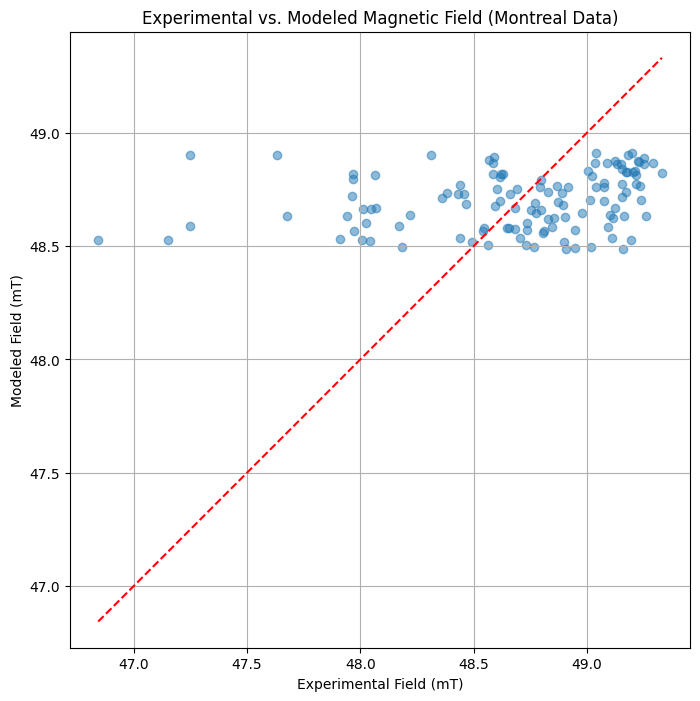

In [28]:
# Create a scatter plot of experimental vs. modeled field
plt.figure(figsize=(8, 8))
plt.scatter(value_data_montreal, modeled_field, alpha=0.5)

# Add a diagonal line representing perfect agreement
max_field = max(value_data_montreal.max(), modeled_field.max())
min_field = min(value_data_montreal.min(), modeled_field.min())
plt.plot([min_field, max_field], [min_field, max_field], color='red', linestyle='--')

plt.xlabel('Experimental Field (mT)')
plt.ylabel('Modeled Field (mT)')
plt.title('Experimental vs. Modeled Magnetic Field (Montreal Data)')
plt.grid(True)
plt.axis('equal') # Ensure equal scaling for both axes
plt.show()

In [31]:
from scipy.special import sph_harm
from scipy.optimize import leastsq
import numpy as np
import pandas as pd

def compute_spherical_harmonic_model(df, value_column='reading'):
    """
    Computes a spherical harmonic model for magnetic field inhomogeneity.

    Args:
        df (pd.DataFrame): DataFrame containing 'x', 'y', 'z', and value_column.
        value_column (str): The name of the column containing the field values.

    Returns:
        tuple: A tuple containing:
            - fitted_params (list): The fitted spherical harmonic coefficients.
            - modeled_field (np.ndarray): The modeled field values at the data points.
            - r_filtered (pd.Series): The radial distances of the data points.
            - theta_filtered (pd.Series): The polar angles of the data points.
            - phi_filtered (pd.Series): The azimuthal angles of the data points.
    """
    # Ensure the DataFrame has the required columns
    if not all(col in df.columns for col in ['x', 'y', 'z', value_column]):
        raise ValueError(f"DataFrame must contain 'x', 'y', 'z', and '{value_column}' columns.")

    # Calculate distance from origin if not already present
    if 'distance_from_origin' not in df.columns:
        df['distance_from_origin'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

    # Use the entire dataframe as the input for the function
    df_filtered = df.copy()

    # Convert Cartesian coordinates to spherical coordinates
    r_filtered = df_filtered['distance_from_origin']
    # Add small epsilon to avoid division by zero for points at the origin
    r_safe = r_filtered + np.finfo(float).eps
    theta_filtered = np.arccos(df_filtered['z'] / r_safe)
    phi_filtered = np.arctan2(df_filtered['y'], df_filtered['x'])

    value_data = df_filtered[value_column]

    # Define a function to calculate the spherical harmonic expansion
    def sh_model(params, r, theta, phi):
        c00 = params[0]
        c10 = params[1]
        c11_real = params[2]
        c11_imag = params[3]

        Y00 = sph_harm(0, 0, phi, theta)
        Y10 = sph_harm(0, 1, phi, theta)
        Y11 = sph_harm(1, 1, phi, theta)

        model_field = c00 * Y00 + c10 * Y10 + (c11_real + 1j * c11_imag) * Y11
        return np.real(model_field)

    # Define the error function
    def error_func(params, r, theta, phi, data):
        return sh_model(params, r, theta, phi) - data

    # Initial guess for the parameters
    initial_params = [np.mean(value_data), 0, 0, 0]

    # Perform the least squares fit
    fitted_params, covariance, infodict, errmsg, success = leastsq(
        error_func,
        initial_params,
        args=(r_filtered, theta_filtered, phi_filtered, value_data),
        full_output=True
    )

    # Calculate the modeled field
    modeled_field = sh_model(fitted_params, r_filtered, theta_filtered, phi_filtered)

    return fitted_params, modeled_field, r_filtered, theta_filtered, phi_filtered

# Example usage with Montreal data:
fitted_params_montreal, modeled_field_montreal, r_montreal, theta_montreal, phi_montreal = compute_spherical_harmonic_model(df_montreal_filtered, value_column='Field')
print("Fitted parameters (Montreal):", fitted_params_montreal)

# Example usage with Cape Town data:
fitted_params_capetown, modeled_field_capetown, r_capetown, theta_capetown, phi_capetown = compute_spherical_harmonic_model(df_capetown, value_column='reading')
print("Fitted parameters (Cape Town):", fitted_params_capetown)

Fitted parameters (Montreal): [ 1.72632754e+02  1.25440854e-01 -3.44731103e-01 -4.90731157e-01]
Fitted parameters (Cape Town): [495.00692223   0.           0.           0.        ]


In [32]:
# Compute the spherical harmonic model for Montreal data
fitted_params_montreal, modeled_field_montreal, r_montreal, theta_montreal, phi_montreal = compute_spherical_harmonic_model(df_montreal_filtered, value_column='Field')

# Compute the spherical harmonic model for Cape Town data
fitted_params_capetown, modeled_field_capetown, r_capetown, theta_capetown, phi_capetown = compute_spherical_harmonic_model(df_capetown, value_column='reading')

# Function to calculate inhomogeneity
def calculate_inhomogeneity(field_data):
    max_value = field_data.max()
    min_value = field_data.min()
    mean_value = field_data.mean()
    inhomogeneity = ((max_value - min_value) / mean_value) * 1e6
    return inhomogeneity

# Compute and print inhomogeneity for Montreal modeled field
inhomogeneity_montreal_modeled = calculate_inhomogeneity(modeled_field_montreal)
print(f"Magnetic field inhomogeneity of Montreal modeled field: {inhomogeneity_montreal_modeled:.2f} ppm")

# Compute and print inhomogeneity for Cape Town modeled field
inhomogeneity_capetown_modeled = calculate_inhomogeneity(modeled_field_capetown)
print(f"Magnetic field inhomogeneity of Cape Town modeled field: {inhomogeneity_capetown_modeled:.2f} ppm")

Magnetic field inhomogeneity of Montreal modeled field: 8741.80 ppm
Magnetic field inhomogeneity of Cape Town modeled field: 0.00 ppm
